   Order_ID Product_Category  Product_Price  Customer_Age  Rating  \
0         1         Clothing         3262.0          58.0     3.0   
1         2         Clothing          214.0          20.0     3.0   
2         3       Home Decor         3429.0          51.0     2.0   
3         4            Books         4568.0          35.0     3.0   
4         5      Electronics         2237.0          32.0     4.0   

           Review_Text  Order_Date  
0  Would not recommend  01-01-2023  
1   Excellent product!  02-01-2023  
2      Value for money  03-01-2023  
3      Value for money  04-01-2023  
4      Not as expected  05-01-2023  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          505 non-null    int64  
 1   Product_Category  481 non-null    object 
 2   Product_Price     485 non-null    float64
 3   Customer_Age      4

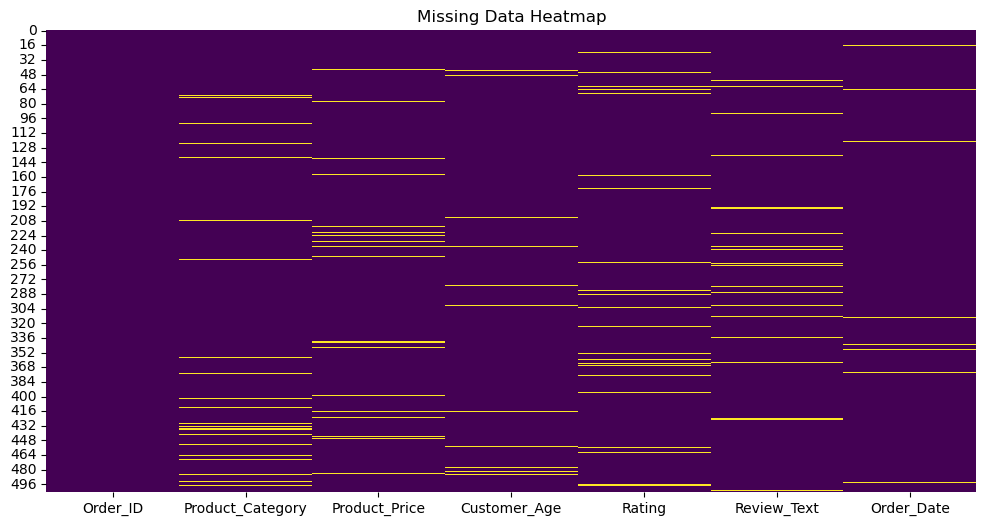

ValueError: 2

In [1]:
import pandas as pd

# Load the e-commerce orders dataset
file_path = 'path_to_your_dataset/ecommerce_orders.csv'  # Update with your actual file path
df = pd.read_csv(r"C:\Users\PALADUGULLA KARTHIK\Desktop\E-Commerce_Data.csv")

# Display the first few rows of the dataset
print(df.head())

# Get a summary of the dataset
print(df.info())
# Check for missing values
missing_values = df.isna().sum()
print("Missing values in each column:\n", missing_values)

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(df)) * 100
print("Percentage of missing values in each column:\n", missing_percentage)
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Analyze the pattern of missing data
# You can use statistical tests or visualizations to determine if data is MCAR, MAR, or MNAR.

from sklearn.impute import SimpleImputer, KNNImputer

# Mean/Median imputation for numerical columns (e.g., Product_Price)
mean_imputer = SimpleImputer(strategy='mean')
df['Product_Price'] = mean_imputer.fit_transform(df[['Product_Price']])

# Mode imputation for categorical columns (e.g., Product_Category)
mode_imputer = SimpleImputer(strategy='most_frequent')
df['Product_Category'] = mode_imputer.fit_transform(df[['Product_Category']])

# Forward fill or backward fill for date-related fields (e.g., Order_Date)
df['Order_Date'] = df['Order_Date'].fillna(method='ffill')  # Forward fill
# Alternatively, you can use backward fill
# df['Order_Date'] = df['Order_Date'].fillna(method='bfill')

# K-Nearest Neighbors (KNN) imputation for complex cases
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df.select_dtypes(include=['float64', 'int64'])), columns=df.select_dtypes(include=['float64', 'int64']).columns)

# Combine the imputed numerical columns with the original DataFrame
df[df.select_dtypes(include=['float64', 'int64']).columns] = df_knn_imputed

